In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
%matplotlib inline
sns.set(style="whitegrid")


In [7]:
# Example: loading CSV dataset
df = pd.read_csv(r'C:\Users\Dar Computers\Desktop\10Acadamy\week 5\Credit_Risk_Probability_Model\data\raw\data.csv')

# Quick view
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
# Number of rows and columns
print("Shape of dataset:", df.shape)

# Data types and non-null counts
df.info()


Shape of dataset: (95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  in

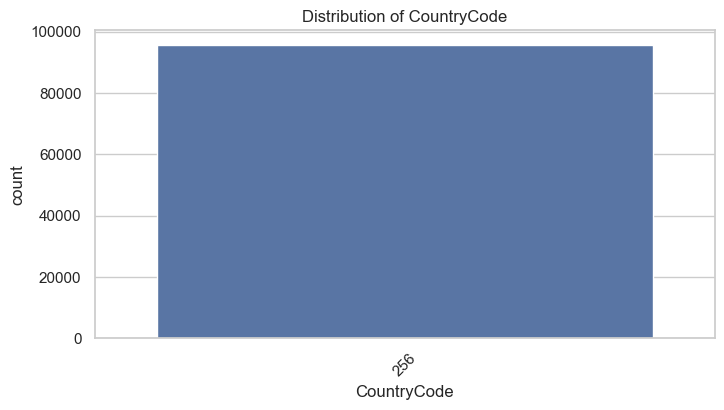

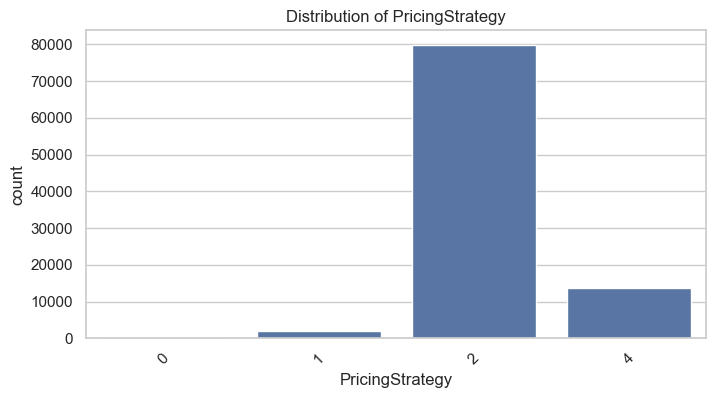

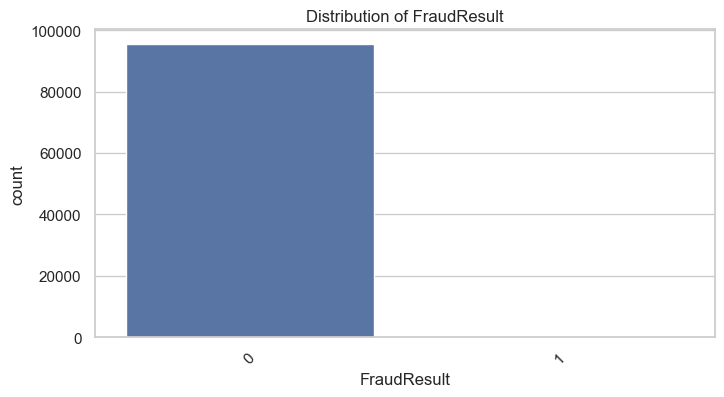

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your specific columns of interest
selected_cols = ["CountryCode", "PricingStrategy", "FraudResult"]

for col in selected_cols:
    plt.figure(figsize=(8,4))
    
    # Check the data type to decide on plot type
    if df[col].nunique() < 20:
        sns.countplot(x=col, data=df)
    else:
        sns.histplot(df[col], kde=True)
    
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


Skipped TransactionId due to high cardinality (95662 unique values).
Skipped BatchId due to high cardinality (94809 unique values).
Skipped AccountId due to high cardinality (3633 unique values).
Skipped SubscriptionId due to high cardinality (3627 unique values).
Skipped CustomerId due to high cardinality (3742 unique values).


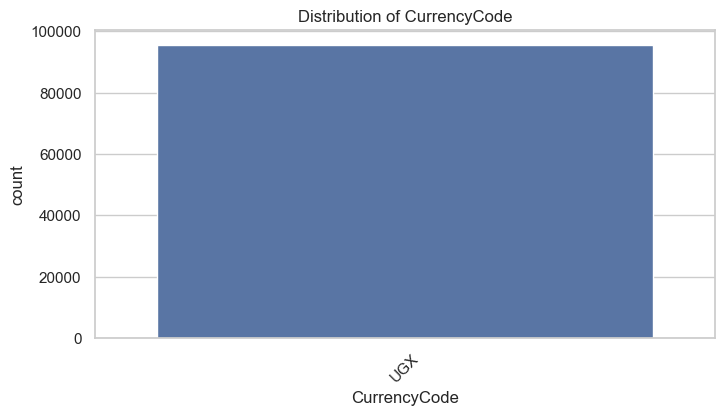

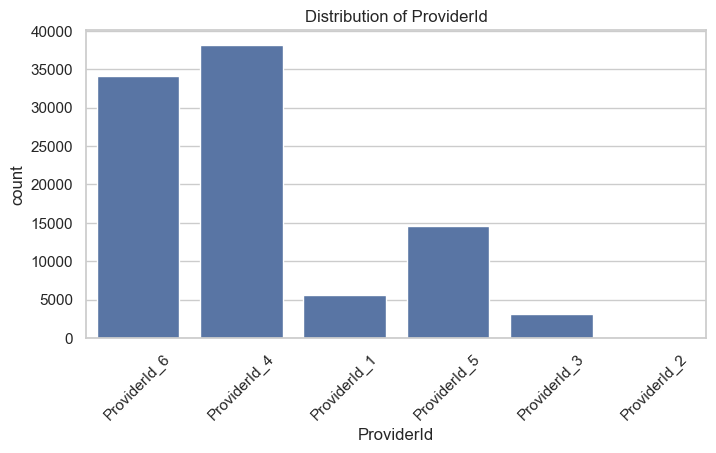

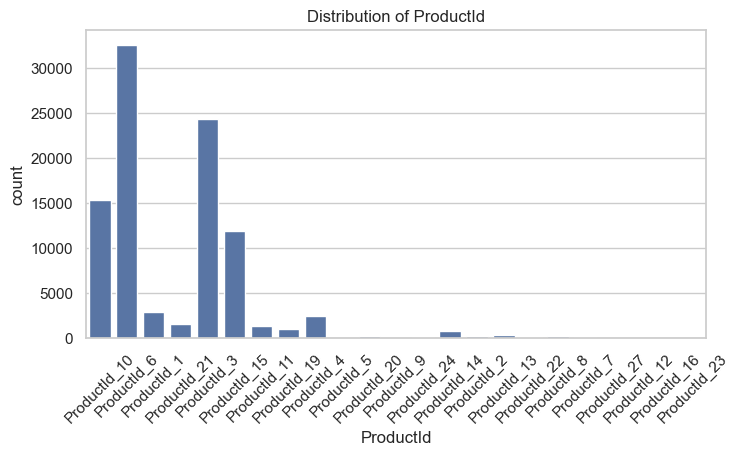

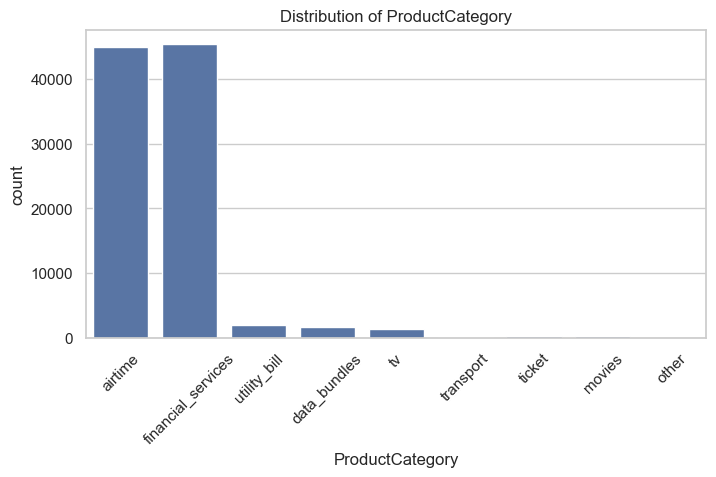

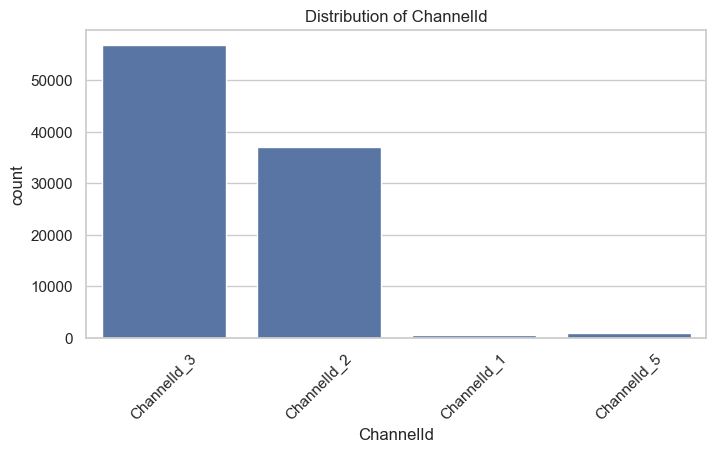

Skipped TransactionStartTime due to high cardinality (94556 unique values).


In [26]:

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    if df[col].nunique() < 50:  # Set threshold as needed
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, data=df)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Skipped {col} due to high cardinality ({df[col].nunique()} unique values).")


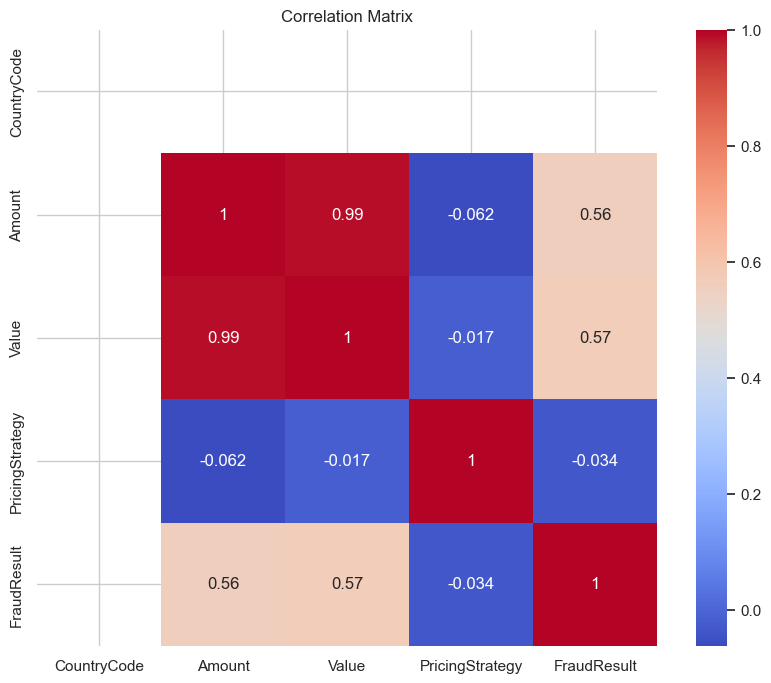

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [32]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing_percent = (missing / len(df)) * 100

print("Missing values (%):")
print(missing_percent)


Missing values (%):
Series([], dtype: float64)



### 📝 Missing Values Analysis

The analysis shows that **there are no missing values in the dataset**. This simplifies the data preprocessing pipeline, as no imputation strategies are required at this stage.

✅ **Implication:**  
We can proceed directly to feature engineering and modeling without handling null values.


### 🔗 Correlation Matrix Insights

The correlation matrix shows the pairwise linear correlations among selected numerical features:

- **Amount and Value:**  
  These two features have an extremely high positive correlation (**0.99**), indicating they carry almost identical information. To avoid multicollinearity in modeling, one of them (usually Value if it is a derived feature) can be dropped during feature engineering.

- **FraudResult correlations:**  
  - With **Amount**: 0.56  
  - With **Value**: 0.57  
  These are moderate positive correlations, suggesting that higher transaction Amount or Value is associated with a higher likelihood of fraud. These variables are therefore important predictors for fraud detection.

- **PricingStrategy:**  
  Very low correlations with other numerical features (maximum absolute correlation ~0.06), indicating it does not have a linear relationship with Amount, Value, or FraudResult.

- **CountryCode:**  
  Shows weak to moderate positive correlation (~0.56) with FraudResult. However, if CountryCode has only one unique value in practice (e.g. always 256 for Uganda), it may not be useful despite the numeric correlation.

---

**Business implication:**  
✔️ Consider dropping one of Amount or Value to reduce redundancy.  
✔️ Retain features with meaningful correlations to FraudResult.  
✔️ Explore non-linear relationships in advanced modeling to maximize predictive performance.
